In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt



In [10]:
art = pd.read_csv("Art.csv")
artHood = art.groupby("neighborhood").count()
artHood.sort_values(by=['id'], ascending=False).reset_index()

,index,neighborhood,id,name,title,artist_name,art_type,park,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,9,Central Business District,27,27,27,21,27,4,27,27,27,27,27,27,27,27,27
1,46,Squirrel Hill South,22,22,22,18,22,22,22,22,22,22,22,22,22,22,22
2,0,Allegheny Center,18,18,18,17,18,11,18,18,18,18,18,18,18,18,18
3,42,South Side Flats,10,10,10,6,10,6,10,10,10,10,10,10,10,10,10
4,25,Highland Park,10,10,10,7,10,10,10,10,10,10,10,10,10,10,10
5,32,North Shore,7,7,7,7,7,6,7,7,7,7,7,7,7,7,7
6,40,Shadyside,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6
7,11,Central Oakland,5,5,5,2,5,5,5,5,5,5,5,5,5,5,5
8,28,Lower Lawrenceville,5,5,5,1,5,4,5,5,5,5,5,5,5,5,5
9,3,Beechview,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5


In [11]:
ff = pd.read_csv("fastfoodset.csv")

query= ff['Category'] == "Take Out"
takeout= ff[query]
frequency = takeout["ZIP Code"].value_counts().max
print(frequency)
freqchart2=takeout["ZIP Code"].value_counts().sort_values(ascending=False).reset_index()
freqchart2.head(25)
maggiesbest=freqchart2.iloc[0][0]
print(maggiesbest)

<bound method Series.max of 15146    15
15222    10
15205     9
15213     9
15237     8
         ..
15148     1
15201     1
15044     1
15211     1
15238     1
Name: ZIP Code, Length: 68, dtype: int64>
15146


In [12]:
plumbers = pd.read_csv("Plumbers.csv")
frequency = plumbers["zip"].value_counts().max
print(frequency)

frequency2 = plumbers["zip"].value_counts().sort_values(ascending = False).reset_index()
frequency2.head(25)
best = frequency2.iloc[0][0]
print(best)

<bound method Series.max of 15642    45
15237    44
15236    40
15227    35
15120    35
         ..
15331     1
15027     1
15479     1
16038     1
na        1
Name: zip, Length: 209, dtype: int64>
15642


,index,zip
0,15642,45
1,15237,44
2,15236,40
3,15120,35
4,15227,35
...,...,...
204,15347,1
205,46112,1
206,15342,1
207,15035,1


In [13]:

bestzip=0
largestnum=0
combineddata=pd.DataFrame(columns=['zipcode','average'])
for row in freqchart2.itertuples(index = True, name ='P'): 
    mnum=getattr(row, 'index')
    #print(isinstance(mnum,int))
    #print(isinstance(row,int))
    for row2 in frequency2.itertuples(index = True, name ='Pandas'):
        #frequency2[frequency2.index!="na"]
        
        try:
            jnum=(getattr(row2, "index"))
            jnum=int(jnum)
        except ValueError:
            x=True
        #print(isinstance(jnum,int))
        #print(mnum)
        #print(jnum)
        if(mnum==jnum):
            #print(mnum)
            try:
                row2int=row2[2]
                row2int=int(row2int)
            except ValueError:
                x=True
            avg=(row[2]+row2int)/2
            newrow={'zipcode':mnum,'average':avg}
            #print(newrow)
            combineddata=combineddata.append(newrow, ignore_index=True)
            break
combineddata=combineddata.sort_values(by=['average'],ascending=False)
print(combineddata)
#print(bestzip)
#print(largestnum)
                

    zipcode  average
3   15237.0     26.0
4   15236.0     24.0
5   15227.0     21.0
15  15120.0     20.0
10  15102.0     19.5
..      ...      ...
48  15144.0      2.0
53  15208.0      2.0
43  15139.0      2.0
59  15003.0      2.0
50  15148.0      1.0

[61 rows x 2 columns]


In [36]:
zipToN = pd.read_csv("ZiptoNeighbor.csv")
flag = True
finalZip = 0
row = 0
while(flag):
    zipOld = combineddata.iloc[row][0]
    #print(zip)
    row2 = 0
    while(row2<len(zipToN)):
        #print(row2)
        zipNew = zipToN.iloc[row2][2]
        if(zipOld == zipNew):
            flag = False
            finalZip = zipNew
        row2 = row2 + 1
    row = row+1
print(finalZip)
row = 0
possibleHood = []
while(row<len(zipToN)):
    tempZip = zipToN.iloc[row][2]
    if(tempZip == finalZip):
        possibleHood.append(zipToN.iloc[row][1])
    row = row+1
print(possibleHood)

overallCount = 0
overallName = ''
for i in artHood.itertuples(index = True, name ='arty'):
    name = getattr(i, "neighborhood")
    count = getattr(i, 'id')
    for x in possibleHood:
        if(name == x):
           # print(name)
            #print(count)
            if(count > overallCount):
                overallCount = count
                overallName = name
print(overallName)

15227
['Hays', 'Overbrook']
Hays


In [42]:
frequency2.head()

,index,zip
0,15642,45
1,15237,44
2,15236,40
3,15120,35
4,15227,35


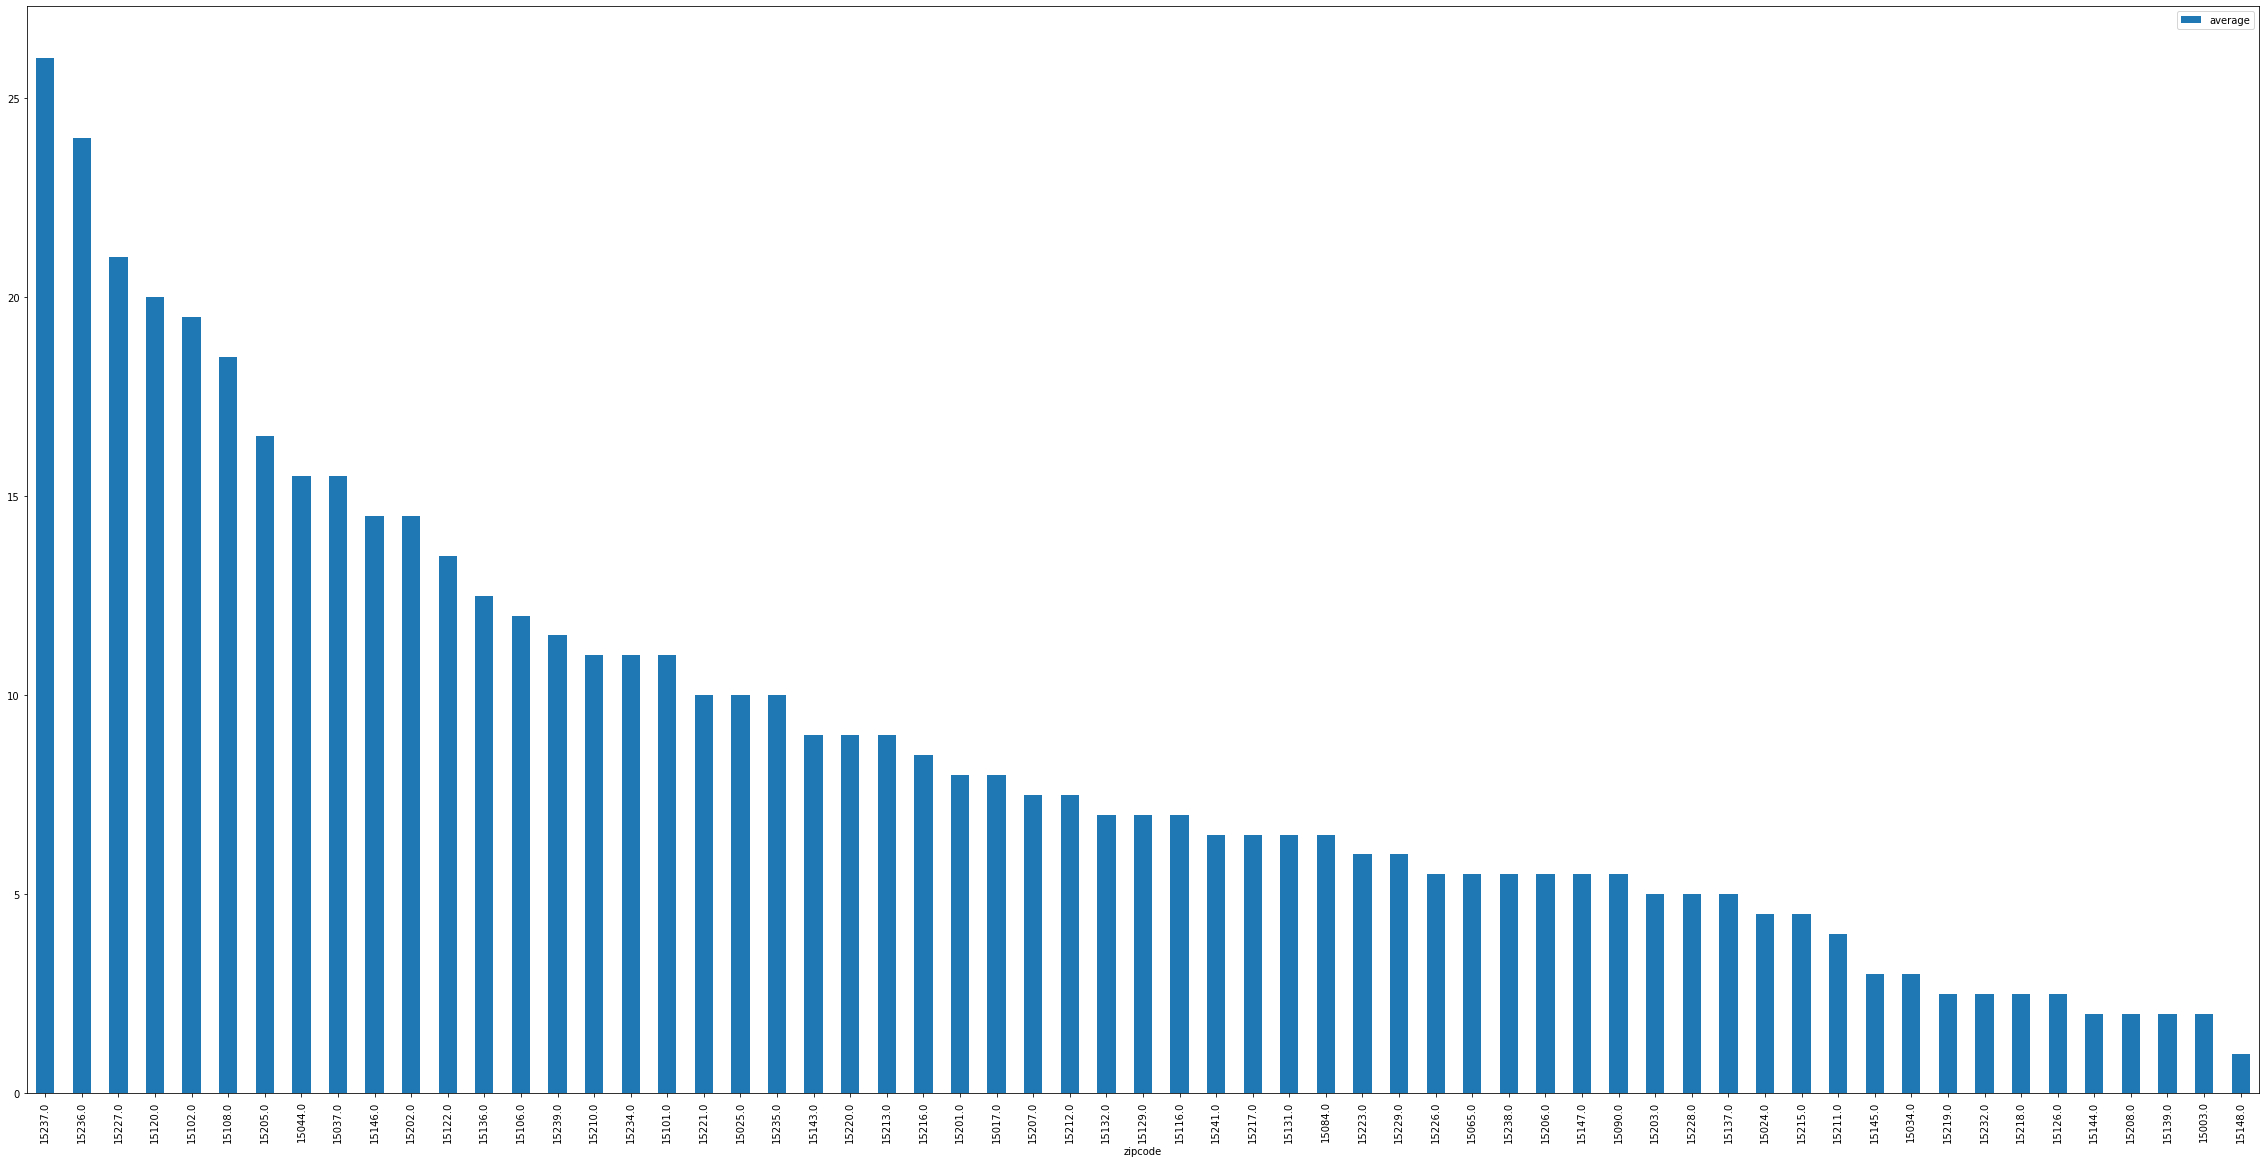

In [113]:
combineddata.plot.bar(x='zipcode',y='average', figsize=(40,20))

In [1]:

art = pd.read_csv("Art.csv")
artHood = art.groupby("neighborhood").count().reset_index()

NameError: name 'pd' is not defined